In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
dataset = pd.read_csv('Data.csv')
# Features as columns ,dependent variable in last column
# iloc is locate index of columns [rows,columns]
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

In [4]:
# Take Care of Missing values
dataset.isnull().sum()
# if 1% missing data ten droping/removing is good
# if 5% missing data then replace it with mean or median

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(X[:,1:3])
# it will do replacement of missing values with mean of column
X[:,1:3] = imputer.transform(X[:,1:3]).round(2)

In [6]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.78]
 ['France' 35.0 58000.0]
 ['Spain' 38.78 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [7]:
# Encoding Categorical Data
# Encoding the Independent Variable
# one hot encoding is used to convert categorical data into numerical data

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [8]:
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.78]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.78 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [9]:
# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

In [10]:
print(Y)

[0 1 0 0 1 1 0 1 0 1]


In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [12]:
print(X_train)

[[0.0 0.0 1.0 38.78 52000.0]
 [0.0 1.0 0.0 40.0 63777.78]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [16]:
print(X_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [17]:
print(Y_train)

[0 1 0 0 1 1 0 1]


In [18]:
print(Y_test)

[0 1]


# Feature scaling id done after splitting data

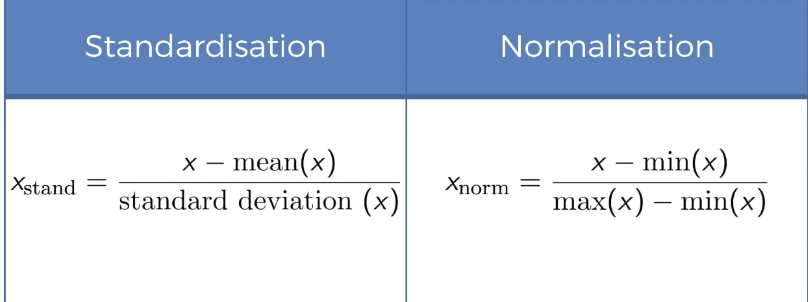

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [21]:
print(X_train)
print("HHHHHHHHH")
print(X_test)

[[0.0 0.0 1.0 -0.191310975315426 -1.0781259664122196]
 [0.0 1.0 0.0 -0.014157738211198064 -0.07013151011913539]
 [1.0 0.0 0.0 0.5666725473764351 0.6335624099933242]
 [0.0 0.0 1.0 -0.3045728810050147 -0.30786619702972484]
 [0.0 0.0 1.0 -1.9018561663710059 -1.4204636416933283]
 [1.0 0.0 0.0 1.1475028329640684 1.2326533417352645]
 [0.0 1.0 0.0 1.4379179757578848 1.5749910170163732]
 [1.0 0.0 0.0 -0.7401955951957395 -0.5646194534905564]]
HHHHHHHHH
[[0.0 1.0 0.0 -1.4662334521802811 -0.9069571287716651]
 [1.0 0.0 0.0 -0.44978045240192294 0.20564031589193826]]
